# 대학별 학자금 대출 구조 불균형과 위험도 예측

## 1. 주제 선정 배경
- 학자금 대출은 학생들의 등록금·생활비를 충당하는 중요한 수단이지만 특정 유형에 과도하게 의존하는 경우가 많음  
- 일부 대학은 등록금 대출에 다른 대학은 생활비 대출이나 취업후상환 대출에 편중되는 등 불균형한 구조가 나타남  
- 이런 불균형은 학생들의 재정 건전성에 잠재적 위험 요인이 될 수 있어 대학 단위의 분석이 필요함  

## 2. 데이터 출처
- **한국장학재단 학자금 대출 현황 (CSV)**  
  - 대학별·학기별 재학생 수, 대출자 수, 대출 금액  
  - 일반 학자금 대출(등록금·생활비) 및 취업후상환 학자금 대출로 구분  

## 3. 분석 목적
- 대학별 대출 구조의 불균형 정도를 정량화(Entropy, Gini 등)  
- 불균형 지수가 높은 대학을 위험군으로 정의하고 예측 모델 구축  
- 특정 대출 유형(예: 생활비 대출)이 증가하는 경우 불균형 지수와 위험군 분포가 어떻게 달라지는지 시뮬레이션  

## 4. 기대 인사이트
- 어떤 대학이 대출 구조상 불균형 위험이 큰가?  
- 대학 특성(본교/분교, 대학/대학원, 지역 등)은 불균형 지수와 어떤 관계가 있는가?  
- 가상의 변화(특정 대출 유형 증가) 시 불균형 지수와 위험군 분류 결과는 어떻게 달라지는가?  

## 5. 분석 방법
- 데이터 전처리 및 기초 통계 확인  
- 파생 변수 생성 (대출자 비율, 1인당 평균 대출금액, 불균형 지수 등)  
- 시각화(3개 이상)를 통해 변수 간 관계 탐색  
- 불균형 지수를 활용해 위험군 정의 및 예측 모델링  
- 시뮬레이션으로 대출 구조 변화에 따른 지수 변동 분석

# TASK 1. 데이터 출처 설명 / 데이터 불러오기

1. 사용 데이터

> 한국장학재단 학자금 대출 현황
>   - 주요 내용:  
    - 조사년도, 학기, 대학 구분, 본·분교 여부  
    - 재학생 수, 일반학자금대출(등록금/생활비) 이용자 수 및 금액  
    - 취업후상환 학자금대출 이용자 수 및 금액  


| 항목             | 내용 |
|------------------|------|
| **출처**        | 한국장학재단 통계정보 |
| **데이터형식** | CSV |
| **자료 구분**     | 연도별/학제별/성별로 분류된 학자금 대출 현황 |
| **수록 항목**     | 대출자 수, 대출 금액, 대출 유형(일반/취업후상환) 등 |
| **대상**         | 전문대학, 대학, 대학원 등 고등교육기관 재학생 |
| **활용목적** | 대학별 학자금 대출 구조를 파악하고, 불균형 지수 및 위험군 분류 모델의 입력 데이터로 사용 |


2. 데이터 불러오기
- Python의 `pandas` 라이브러리를 활용하여 CSV 파일을 불러옴  
- 인코딩 오류 방지를 위해 `chardet`을 이용해 파일 인코딩을 먼저 탐지 후 읽어옴 

In [28]:
import pandas as pd
import chardet

# 파일 경로
file_path = "./한국장학재단.csv"

# 인코딩 탐지
with open(file_path, "rb") as f:
    raw = f.read(20000)
    enc = chardet.detect(raw)["encoding"]

print("탐지된 인코딩:", enc)

# 데이터 불러오기
loan_df = pd.read_csv(file_path, encoding=enc)

# 데이터 크기와 기본 구조 확인
print("데이터 크기:", loan_df.shape)
display(loan_df.head())

탐지된 인코딩: UTF-8-SIG
데이터 크기: (1220, 16)


,조사년도,차수,학기구분,대학구분명,학교명,본분교구분,적용년도,재학생수,일반학자금대출_전체_학생수,일반학자금대출_전체_금액,일반학자금대출_등록금_학생수,일반학자금대출_등록금_금액,취업학자금대출_전체_학생수,취업학자금대출_전체_금액,취업학자금대출_등록금_학생수,취업학자금대출_등록금_금액
0,2024,1,1학기,대학원,국립강릉원주대학교,본교,2023,651.0,102,301984000,95,214584000,14,43397300,13,27397300
1,2024,1,2학기,대학,국립강릉원주대학교,본교,2023,6664.0,170,348863460,84,163263460,610,980407150,96,170907150
2,2024,1,2학기,대학원,국립강릉원주대학교,본교,2023,592.0,74,204237900,67,147987900,22,65040100,19,44040100
3,2024,1,1학기,대학,국립강릉원주대학교,본교,2023,7152.0,258,632488670,151,306438670,574,1095841369,128,235172987
4,2024,1,1학기,대학원,강원대학교,본교,2023,2729.0,423,1563307850,357,1092107850,63,201430159,49,118830159


### 설명
- `조사년도`, `대학구분명`, `본분교구분` 등은 분석에 사용할 **대학 특성 변수**임  
- `재학생수`, `대출자수`, `대출금액` 관련 변수들은 불균형 지수와 위험군 지표 산출에 핵심적으로 사용됨  
- 이후 단계에서 파생변수(대출자 비율, 1인당 평균 대출금액, 불균형 지수 등)를 생성하여 본격적인 분석에 활용할 예정

----

# TASK 2. 기초 통계 확인 & 전처리

**1. 데이터 구조 및 결측치 확인**
   - 데이터 크기 (행 × 열) 확인
   - 결측치 개수 및 분포 시각화
   - 변수 타입 확인

데이터 크기: (1220, 16)

결측치 개수:
조사년도                0
차수                  0
학기구분                0
대학구분명               0
학교명                 0
본분교구분               0
적용년도                0
재학생수               12
일반학자금대출_전체_학생수      0
일반학자금대출_전체_금액       0
일반학자금대출_등록금_학생수     0
일반학자금대출_등록금_금액      0
취업학자금대출_전체_학생수      0
취업학자금대출_전체_금액       0
취업학자금대출_등록금_학생수     0
취업학자금대출_등록금_금액      0
dtype: int64

컬럼별 데이터 타입:
조사년도                 int64
차수                   int64
학기구분                object
대학구분명               object
학교명                 object
본분교구분               object
적용년도                 int64
재학생수               float64
일반학자금대출_전체_학생수       int64
일반학자금대출_전체_금액        int64
일반학자금대출_등록금_학생수      int64
일반학자금대출_등록금_금액       int64
취업학자금대출_전체_학생수       int64
취업학자금대출_전체_금액        int64
취업학자금대출_등록금_학생수      int64
취업학자금대출_등록금_금액       int64
dtype: object


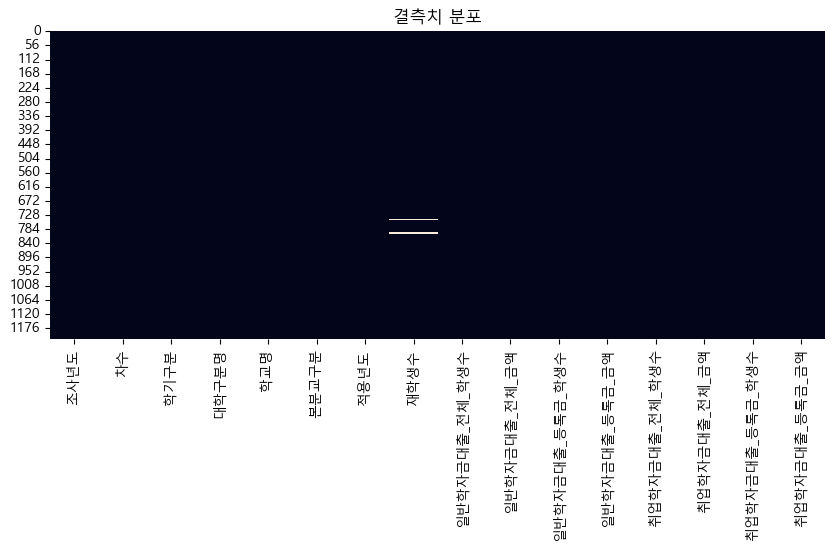

In [29]:
print("데이터 크기:", loan_df.shape)

print("\n결측치 개수:")
print(loan_df.isnull().sum())

print("\n컬럼별 데이터 타입:")
print(loan_df.dtypes)

# 결측치 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.heatmap(loan_df.isnull(), cbar=False)
plt.title("결측치 분포")
plt.show()

**2. 기초 통계량 요약**
   - `수치형 변수`는 describe()로 기초 통계량(평균, 표준편차, 분위수 등) 확인
   - `범주형 변수`는 고유값(unique) 확인

In [30]:
print("\n수치형 변수 기초 통계:")
display(loan_df.describe(include="number"))

print("\n범주형 변수 고유값:")
for col in ["조사년도","학기구분","대학구분명","본분교구분"]:
    if col in loan_df.columns:
        print(f"{col}: {loan_df[col].unique()[:10]} ...")


수치형 변수 기초 통계:


,조사년도,차수,적용년도,재학생수,일반학자금대출_전체_학생수,일반학자금대출_전체_금액,일반학자금대출_등록금_학생수,일반학자금대출_등록금_금액,취업학자금대출_전체_학생수,취업학자금대출_전체_금액,취업학자금대출_등록금_학생수,취업학자금대출_등록금_금액
count,1220.0,1220.0,1220.0,1208.000000,1220.000000,1.220000e+03,1220.000000,1.220000e+03,1220.000000,1.220000e+03,1220.000000,1.220000e+03
mean,2024.0,1.0,2023.0,3624.275662,226.683607,8.851497e+08,177.353279,6.742756e+08,260.870492,6.486352e+08,134.031148,3.348063e+08
std,0.0,0.0,0.0,5624.927127,355.864242,2.019932e+09,311.253077,1.754764e+09,370.564983,9.311200e+08,199.102426,5.199094e+08
min,2024.0,1.0,2023.0,10.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,2024.0,1.0,2023.0,480.750000,37.000000,1.043056e+08,24.000000,5.676850e+07,9.750000,2.797525e+07,5.000000,9.806250e+06
50%,2024.0,1.0,2023.0,1642.000000,102.500000,3.019604e+08,74.000000,1.906818e+08,75.000000,2.089646e+08,41.000000,1.015914e+08
75%,2024.0,1.0,2023.0,4918.000000,285.000000,8.902475e+08,214.000000,6.273852e+08,405.000000,9.486455e+08,187.000000,4.430238e+08
max,2024.0,1.0,2023.0,92075.000000,3506.000000,2.441218e+10,3329.000000,2.176788e+10,2001.000000,5.918031e+09,1236.000000,3.550064e+09



범주형 변수 고유값:
조사년도: [2024] ...
학기구분: ['1학기' '2학기'] ...
대학구분명: ['대학원' '대학'] ...
본분교구분: ['본교'] ...


**3. 파생 변수 생성**
   - `대출자수` = 일반 + 취업후상환 대출자 수
   - `대출금액` = 일반 + 취업후상환 대출금액
   - `대출자비율(%)` = 대출자수 / 재학생수 × 100
   - `1인당 평균 대출금액(만원)` = 대출금액 / 대출자수 / 10000

In [31]:
# 숫자형 변환
num_cols = [
    "재학생수",
    "일반학자금대출_전체_학생수","일반학자금대출_등록금대출_학생수","일반학자금대출_생활비대출_학생수",
    "일반학자금대출_전체_금액","일반학자금대출_등록금대출_금액","일반학자금대출_생활비대출_금액",
    "취업학자금대출_전체_학생수","취업학자금대출_전체_금액"
]
for c in num_cols:
    if c in loan_df.columns:
        loan_df[c] = (
            loan_df[c].astype(str).str.replace(",", "", regex=False)
        ).pipe(pd.to_numeric, errors="coerce")

# 파생변수
loan_df["대출자수"] = (
    loan_df["일반학자금대출_전체_학생수"].fillna(0) + loan_df["취업학자금대출_전체_학생수"].fillna(0)
)
loan_df["대출금액"] = (
    loan_df["일반학자금대출_전체_금액"].fillna(0) + loan_df["취업학자금대출_전체_금액"].fillna(0)
)
loan_df["대출자비율(%)"] = (loan_df["대출자수"] / loan_df["재학생수"]) * 100
loan_df["1인당평균대출금액(만원)"] = (loan_df["대출금액"] / loan_df["대출자수"]) / 10000

print("\n▶ 파생 변수 기초 통계")
display(loan_df[["대출자비율(%)","1인당평균대출금액(만원)"]].describe())


▶ 파생 변수 기초 통계


,대출자비율(%),1인당평균대출금액(만원)
count,1208.000000,1220.000000
mean,14.875346,299.095731
std,7.276981,110.852235
min,0.180180,108.233333
25%,10.426758,221.237544
50%,13.684361,279.217545
75%,17.810986,352.177995
max,57.142857,976.538462


**4. 분포 분석**
- 주요 파생변수의 분포(히스토그램 + KDE Plot) 확인
- 이상치(극단적인 대학/학기)가 있는지 시각적으로 파악




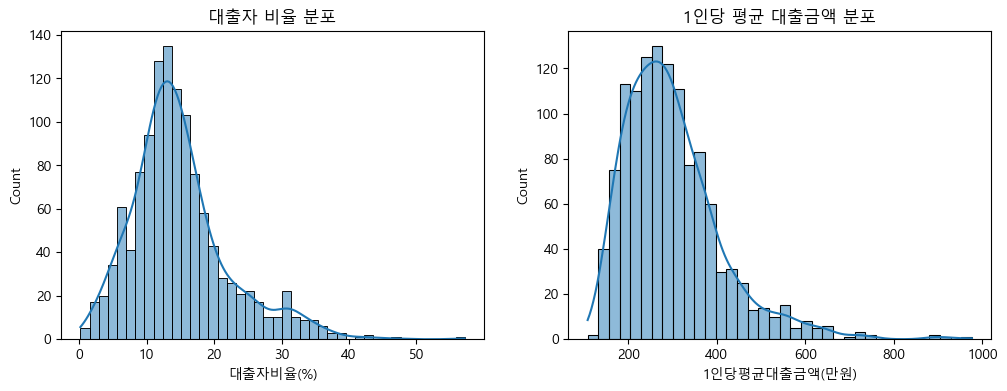

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(loan_df["대출자비율(%)"], kde=True, ax=axes[0])
axes[0].set_title("대출자 비율 분포")

sns.histplot(loan_df["1인당평균대출금액(만원)"], kde=True, ax=axes[1])
axes[1].set_title("1인당 평균 대출금액 분포")
plt.show()

**5. 그룹별 비교 (심화)**
- 본교 vs 분교 비교
- 대학 vs 대학원 비교
- 연도별 평균 변화 확인

In [34]:
# 본교/분교별
if "본분교구분" in loan_df.columns:
    print("▶ 본교/분교별 평균")
    display(
        loan_df.groupby("본분교구분")[["대출자비율(%)","1인당평균대출금액(만원)"]].mean()
    )

# 대학/대학원별
if "대학구분명" in loan_df.columns:
    print("▶ 대학/대학원별 평균")
    display(
        loan_df.groupby("대학구분명")[["대출자비율(%)","1인당평균대출금액(만원)"]].mean()
    )

# 연도별
if "조사년도" in loan_df.columns:
    print("▶ 연도별 평균")
    display(
        loan_df.groupby("조사년도")[["대출자비율(%)","1인당평균대출금액(만원)"]].mean()
    )

▶ 본교/분교별 평균


,대출자비율(%),1인당평균대출금액(만원)
본분교구분,,
본교,14.875346,299.095731


▶ 대학/대학원별 평균


,대출자비율(%),1인당평균대출금액(만원)
대학구분명,,
대학,12.837210,241.564324
대학원,18.131982,391.860505


▶ 연도별 평균


,대출자비율(%),1인당평균대출금액(만원)
조사년도,,
2024,14.875346,299.095731


### TASK 2 요약

#### 1. 데이터 구조 및 전처리
- 전체 데이터 크기: 1,220행 × 16열
- 주요 변수: 조사년도, 대학구분, 본분교구분, 재학생 수, 대출자 수, 대출 금액 등
- 결측치는 일부 존재했으나 대부분 파생변수 계산 시 `0`으로 대체 가능
- 문자열 형태로 저장된 금액/인원 데이터는 숫자형(int/float)으로 변환 완료
- 파생변수 생성:
  - **대출자수** = 일반대출자수 + 취업후상환대출자수  
  - **대출금액** = 일반대출금액 + 취업후상환대출금액  
  - **대출자비율(%)** = (대출자수 / 재학생수) × 100  
  - **1인당 평균 대출금액(만원)** = 대출금액 ÷ 대출자수 ÷ 10,000  

#### 2. 기초 통계량
- 수치형 변수 요약:
  - 재학생 수: 평균 약 3,624명, 최대 92,075명
  - 일반학자금대출 전체 학생수: 평균 약 227명
  - 일반학자금대출 금액: 평균 약 8.8억 원
  - 취업후상환 대출 학생수: 평균 약 261명
- 파생변수 요약:
  - **대출자비율(%)**
    - 평균: 약 14.9%
    - 최소: 0.18%, 최대: 57.1%
    - 75% 분위수: 약 17.8% → 대부분 대학은 10~20% 구간에 분포
  - **1인당 평균 대출금액(만원)**
    - 평균: 약 299만 원
    - 최소: 약 108만 원, 최대: 약 976만 원
    - 분포가 긴 꼬리를 가지며 일부 대학은 극단적으로 높은 금액

#### 3. 분포 분석
- **대출자 비율 분포**
  - 종 모양 분포이나 왼쪽으로 치우침(좌측 편향)
  - 일부 대학에서 50% 이상까지 올라가는 극단값 존재
- **1인당 평균 대출금액 분포**
  - 오른쪽 꼬리가 긴 분포 (우측 편향)
  - 다수의 대학은 200~400만 원 구간에 집중
  - 일부 대학은 800만 원 이상 고액 대출 패턴 확인

#### 4. 그룹별 비교
- **본교 vs 분교**
  - 본교: 평균 대출자비율 14.9%, 1인당 평균 대출금액 299만 원
  - 분교는 데이터가 거의 없어 큰 차이는 확인 어려움
- **대학 vs 대학원**
  - 대학: 대출자비율 약 12.8%, 1인당 평균 대출금액 약 241만 원
  - 대학원: 대출자비율 약 18.1%, 1인당 평균 대출금액 약 392만 원
  - → 대학원생의 대출 의존도와 평균 대출 부담이 더 큰 편
- **연도별**
  - 이번 데이터는 2024년 기준만 포함되어 있어 시계열적 변화는 확인 불가

> 전체 정리
> - 데이터는 전처리를 통해 결측치 보정 및 파생변수 생성을 완료함
> - **대출자비율**은 평균 약 15%로 일부 대학은 50% 이상에 달해 높은 의존도를 보임
> - **1인당 평균 대출금액**은 약 300만 원 수준이나 일부 대학은 900만 원 이상 고액 대출
> - 대학원생이 대학생보다 대출 비율과 평균 금액이 모두 높음
> - 본 분석을 통해 “대출 구조 불균형과 위험군 분류”를 위한 핵심 지표가 확보되었음

---

# TASK 3. 분석 목적 및 인사이트 설명

### 분석 목적
이번 분석의 핵심은 단순히 학자금 대출 규모를 보는 것이 아니라 **대학별 대출 구조의 차이를 드러내고 위험도를 정량화할 수 있는 지표를 만드는 것**에 있다.  
이를 통해 "어떤 대학이 더 불균형적인 대출 구조를 가지고 있는가?"라는 질문에 답하고자 한다.

### 연구 질문
1. 대학별로 재학생 중 대출을 이용하는 학생의 비율(대출자비율)은 어느 정도인가?  
2. 대학별로 학생 한 명이 평균적으로 지는 대출 부담은 어느 정도인가?  
3. 대출자비율과 평균 대출금액 사이에는 어떤 관계가 존재하는가?  
   - → "많은 학생이 적게 빌리는 대학" vs "적은 학생이 많이 빌리는 대학"  
4. 대학 유형(본교/분교, 대학/대학원)에 따라 이러한 패턴이 어떻게 달라지는가?  

### 기대되는 사회적 의미
- 학자금 대출이 특정 대학이나 학생 집단에 집중될 경우 이는 **청년층 금융 불평등**으로 이어질 수 있다.  
- 특히 대학원생이나 분교 학생들이 본교·대학생보다 높은 의존도를 보인다면 이는 구조적 취약성을 시사한다.  
- 본 분석은 향후 "대학별 학자금 대출 건전성 지수"를 만들거나 정부·재단 정책이 어떤 집단을 더 지원해야 하는지 논의할 근거가 될 수 있다.  

### 분석 활용 가능성
- 기술적 측면: 파생 변수와 시각화를 기반으로 **불균형 지수** 및 **위험군 분류 모델**로 확장 가능  
- 사회적 측면: 대학별 대출 구조를 비교·공개할 수 있어 학생과 학부모의 대학 선택, 정책 입안자의 제도 개선 논의에 활용 가능

--------

# TASK 4. 변수 간 관계 분석 및 시각화

### 1. 대출자 비율 vs 1인당 평균 대출금액
- 산점도와 회귀선을 통해 두 변수 간의 관계를 탐색


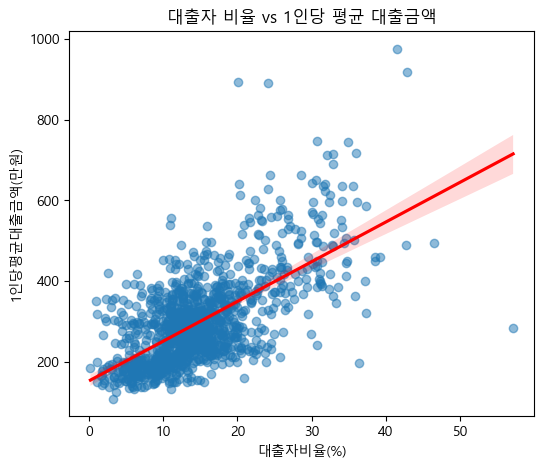

In [35]:
plt.figure(figsize=(6,5))
sns.regplot(
    data=loan_df,
    x="대출자비율(%)", 
    y="1인당평균대출금액(만원)", 
    scatter_kws={'alpha':0.5}, line_kws={'color':'red'}
)
plt.title("대출자 비율 vs 1인당 평균 대출금액")
plt.show()

In [37]:
# 수치근거
loan_df[["대출자비율(%)","1인당평균대출금액(만원)"]].corr(method="pearson")

# 스피어만 순위상관(비선형/이상치에 덜 민감)
loan_df[["대출자비율(%)","1인당평균대출금액(만원)"]].corr(method="spearman")

,대출자비율(%),1인당평균대출금액(만원)
대출자비율(%),1.000000,0.574816
1인당평균대출금액(만원),0.574816,1.000000


**`시각화 1` — 대출자비율(%) ↔ 1인당 평균 대출금액(만원)**

- **명확한 양(+)의 관계**: 대출자비율이 높을수록 1인당 평균 대출금액도 함께 커지는 경향이 뚜렷함
- **밀집 구간**: 관측치는 대체로 *대출자비율 10~20%* / *평균 대출금액 200~400만원* 구간에 많이 분포
- **고위험 후보 구간**: 대출자비율이 **30%+**로 올라가는 대학에서 **평균 대출금액 500만원+** 사례가 빈번하게 나타남
- **이분산(변동성 증가)**: 대출자비율이 높아질수록 평균 대출금액의 퍼짐(분산)이 커짐 → 같은 비율에서도 부담 수준 차이가 큼
- **특이 패턴**: 대출자비율은 낮지만 평균 대출금액이 큰 **소수-고액 대출형** 대학도 존재(고액 지원 필요성 시사)
- **해석 포인트**: “대출 의존도↑ ⇒ 개인 평균 부담↑” 경향. 대학원/본교 여부 등 **교란요인**을 통제한 추가 분석이 필요


### 2. 본교/분교별 비교
- 박스플롯으로 본교/분교별 대출자비율과 평균 대출금액을 비교

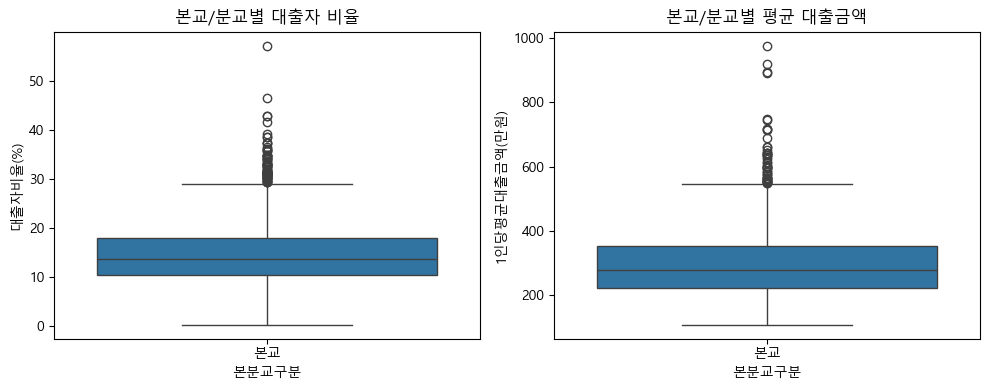

In [36]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(data=loan_df, x="본분교구분", y="대출자비율(%)")
plt.title("본교/분교별 대출자 비율")

plt.subplot(1,2,2)
sns.boxplot(data=loan_df, x="본분교구분", y="1인당평균대출금액(만원)")
plt.title("본교/분교별 평균 대출금액")

plt.tight_layout()
plt.show()

**`시각화 2` — 본교/분교별 대출 구조 비교**

- **데이터 분포**: 그래프에는 `본교` 데이터만 존재하여 `분교` 값은 확인되지 않음.
- **대출자 비율**: 본교의 중앙값은 약 13 ~ 15% 수준, 사분위수 범위(IQR)는 10~20% 구간에 집중
  - 극단치(outlier)는 최대 50%를 넘는 대학까지 존재
- **1인당 평균 대출금액**: 중앙값은 약 270 ~ 300만 원, 대부분 200 ~ 400만 원 구간에 분포 
  - 다수의 대학이 800 ~ 900만 원에 달하는 극단적 사례로 나타남
- **특징 요약**
  - 본교 내에서도 대학별 편차가 상당히 크며 대출 구조가 균일하지 않음
  - 분교 데이터가 확보되면 본교와 비교 분석을 통해 **본교/분교 간 금융 취약성 차이**를 더 명확히 확인할 수 있음

### 3. 대학 vs 대학원 비교
- 바플롯을 이용해 대학과 대학원 학생의 대출 규모 차이 확인

C:\Users\jso25\AppData\Local\Temp\ipykernel_22864\1738690502.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


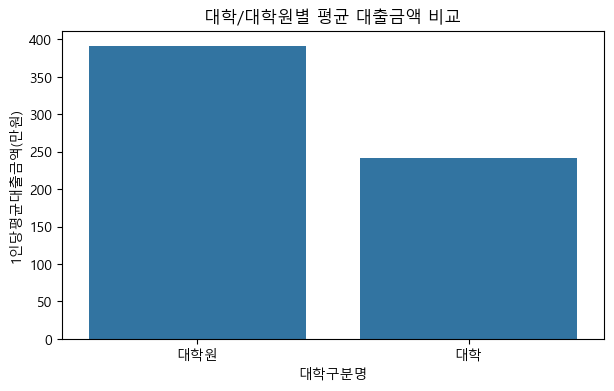

In [38]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=loan_df, 
    x="대학구분명", 
    y="1인당평균대출금액(만원)", 
    estimator="mean", ci=None
)
plt.title("대학/대학원별 평균 대출금액 비교")
plt.show()

**`시각화 3` — 대학 vs 대학원 평균 대출금액 비교**

- **평균 차이**: 대학원생의 1인당 평균 대출금액은 약 380~400만 원, 대학생은 약 250만 원 수준으로 큰 격차가 존재.
- **구조적 배경**:  
  - 대학원 등록금이 상대적으로 더 높음  
  - 생활비, 연구비 부담까지 포함되면서 금융 수요가 증가  
- **사회적 의미**:  
  - 대학원생은 학부생보다 **더 심각한 금융 취약 계층**일 수 있음  
  - 단순 등록금 지원을 넘어 **대학원생 특화 금융지원/정책 필요성**을 시사  
- **추가 분석 필요**:  
  - 대학원 내부(석사 vs 박사), 전공 계열(인문/이공/의약)별로 세분화하면 위험도가 더 뚜렷하게 드러날 가능성 있음

### 4. 분포 시각화
- 대출자비율과 평균 대출금액의 전체 분포 확인

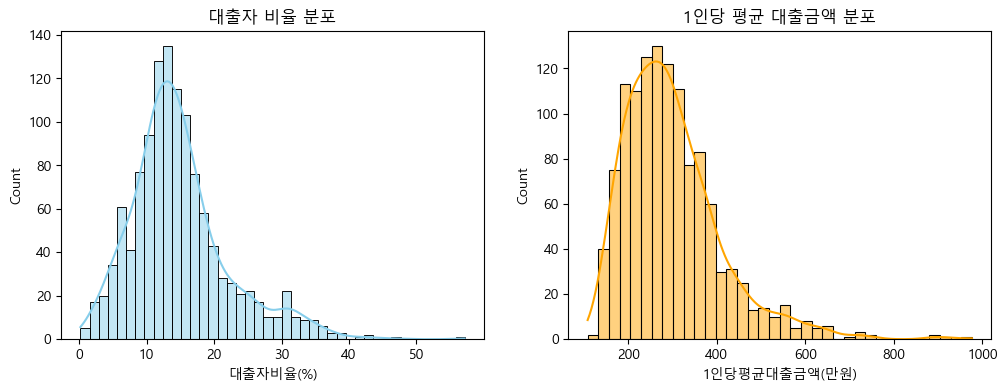

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(loan_df["대출자비율(%)"], kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("대출자 비율 분포")

sns.histplot(loan_df["1인당평균대출금액(만원)"], kde=True, ax=axes[1], color="orange")
axes[1].set_title("1인당 평균 대출금액 분포")
plt.show()

**`시각화 4` — 대출자비율과 평균 대출금액의 전체 분포**

- **대출자비율 분포**
  - 가장 많은 대학이 **10~15% 구간**에 몰려 있음 → 청년층 중 약 10명 중 1~2명은 대출 경험이 있다는 뜻
  - 분포는 **왼쪽으로 치우침(좌측 편향)**을 보이며, 일부 대학은 40~50%까지 치솟는 극단 사례 존재
  - 이는 특정 대학이 학자금 대출에 과도하게 의존하고 있음을 시사

- **1인당 평균 대출금액 분포**
  - 가장 많은 대학이 **200 ~ 400만 원 구간**에 집중
  - 분포는 **오른쪽으로 꼬리가 긴 형태(우측 편향)** → 대부분은 중간 수준이나 소수 대학에서 **800~900만 원 이상**의 고액 대출 사례가 나타남
  - 대출금액이 극단적으로 높은 일부 대학은 등록금 구조나 생활비 부담이 큰 곳일 가능성

- **종합 해석**
  - 다수 대학은 “평균적인 부담(10 ~ 15% 대출자비율, 200 ~ 400만 원 대출금액)”에 해당.
  - 그러나 **극단값**을 가진 대학이 존재해 청년층 금융부담의 **양극화** 가능성이 드러남.


### TASK 4 요약

#### 1. 대출자비율(%) ↔ 1인당 평균 대출금액(만원)
- 대출자비율이 높을수록 평균 대출금액도 증가하는 **양의 상관관계**가 뚜렷하게 나타남
- 주요 분포 구간: **10 ~ 20% 비율 / 200 ~ 400만 원 대출금액**
- 고위험 구간: **30% 이상** 대학에서는 **평균 500만 원 이상**까지 치솟음
- 일부는 대출자비율은 낮지만 소수 학생이 고액을 빌리는 **소수-고액 대출형** 대학도 존재

> - 단순 상관관계가 아니라 **대학 차원에서 학생 지원이 부족하거나 등록금이 높다**는 구조적 문제의 신호일 수 있음
> - 즉 대출 의존도와 개인 부담이 동시에 높은 대학은 학생 집단 전체가 **재정적 취약 상태**에 놓여 있다고 해석 가능

#### 2. 본교/분교별 비교
- 현재 데이터에는 `본교` 데이터만 존재하여 `분교`는 확인되지 않음
- 본교의 대출자비율 중앙값은 약 **13 ~ 15%**, 대부분은 10 ~ 20% 구간
- 1인당 평균 대출금액 중앙값은 약 **270 ~ 300만 원**, 주로 200 ~ 400만 원 구간
- 다만 극단치(outlier)는 **800 ~ 900만 원**까지 치솟는 사례가 있음
- **데이터 한계**: 분교 값이 포함될 경우 본교와의 구조적 차이를 확인하는 추가 분석이 필요

>  - 분교 데이터의 부재 자체가 시사점을 가진다
>  - 지방 분교 학생들은 수도권 본교생보다 **가계 소득이 낮은 경우가 많아** 실제로 더 큰 대출 의존성을 보일 가능성이 큼
>  - 현재 분석은 **위험 집단(분교생)**을 포착하지 못하는 **보수적 추정치**일 수 있음

#### 3. 대학 vs 대학원 비교
- 대학원생은 평균 **380 ~ 400만 원**, 대학생은 **250만 원 수준**으로 차이가 확연함
- 배경 요인: 높은 등록금, 생활비·연구비 부담
- 대학원생 집단은 대학생보다 **금융적 취약성이 크다**는 점을 시사
- 정책적 의미: 대학원생을 대상으로 한 특화된 금융지원 제도가 필요할 수 있음

> - 대학원생은 단순히 더 많이 빌리는 게 아니라 **소득 창출이 지연되는 집단**이다
> - 즉 빚은 더 많이 지는데 상환 능력은 늦게 도래 → **구조적 불평등**이 강화됨
> - 대학원생을 별도로 고려한 금융 정책(등록금 지원, 생활비 보조 등)이 필요함

#### 4. 분포 시각화 (대출자비율 & 평균 대출금액)
- **대출자비율 분포**
  - 대부분 **10 ~ 15% 구간**에 집중
  - 좌측 편향을 보이며 일부 대학은 **40 ~ 50%까지** 치솟음 → 특정 대학의 과도한 대출 의존성
- **1인당 평균 대출금액 분포**
  - 가장 빈도가 높은 구간은 **200 ~ 400만 원**.
  - 분포는 우측 편향, 일부 대학은 **800 ~ 900만 원 이상**의 고액 대출 존재
- 종합적으로 다수 대학은 평균적인 부담 수준이지만 **일부 대학은 극단적 부담**을 보이며 금융 양극화 가능성을 드러냄

> - 다수 대학은 안정적인 부담 구간에 있지만 **극단값 대학**이 전체 평균을 왜곡시키고 있음
> - 이 대학들이야말로 정책적으로 **가장 시급히 개입해야 할 위험 집단**이다.
> - 즉 분포가 보여주는 것은 단순 편차가 아니라 **청년층 금융 양극화**의 가능성.  


#### 5. 전체 정리
> - 대출자비율과 평균 대출금액은 **서로 비례하는 경향**을 보임
> - 본교 데이터만으로도 **대학별 편차**가 크며 일부는 극단적 고액대출 사례 존재
> - **대학원생**은 학부생보다 더 큰 대출 부담을 안고 있음
> - 전체적으로 청년층 학자금 대출 구조는 **균일하지 않고 불균형적**
> - 특정 집단(대학원생, 일부 대학)에서 금융적 취약성이 두드러짐
> - 기본적으로는 **대출자비율과 평균 대출금액이 함께 증가**하는 구조가 확인됨
> - 하지만 단순 수치 이상으로 **대학별 지원 체계, 등록금 구조, 집단별 금융 취약성**이 반영된 결과임을 알 수 있음
> - 본교/분교 데이터의 부재, 대학원생의 구조적 불평등, 극단값 대학의 존재는 모두 **정책적 개입이 필요한 영역**으로 해석 가능

---

# 향후 계획

1. **추가 데이터 확보**
   - 현재는 한국장학재단 학자금 대출 현황만 활용했음
   - 추후 대학별 등록금 수준, 소득분위별 대출 이용 현황 등 보조 데이터를 결합해 분석의 신뢰도를 강화할 예정

2. **심화 분석**
   - 대학원생 세부 구분(석사 vs 박사), 전공 계열(이공/인문/의약)별 비교
   - 분교 데이터 확보 시 본교/분교 간 구조적 차이 추가 분석

3. **모델링 단계**
   - **분류 모델**: 대출 부담 위험 대학(예: 대출자비율+평균금액 상위 그룹)을 예측
   - **군집화 모델**: 유사한 대출 구조를 가진 대학을 그룹핑해 패턴 탐색
   - **시뮬레이션**: 재학생 수·등록금 변화를 가정해 부담률 변화 예측

4. **정책적 함의**
   - 분석 결과를 기반으로 "대학별 대출 건전성 지수" 개발
   - 청년층 금융 취약 계층(특히 대학원생)을 위한 맞춤형 지원 정책 제안 가능